<a href="https://colab.research.google.com/github/vladobo/ArchiMEO/blob/master/playFinger1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python-headless matplotlib

import cv2
import matplotlib.pyplot as plt
import numpy as np

# Upload the MP4 file to Colab
from google.colab import files
uploaded = files.upload()


In [ ]:

# Load the video
video_path = list(uploaded.keys())[0]
cap = cv2.VideoCapture(video_path)

# Variables to store RGB sums
frame_count = 0
red_sums = []
green_sums = []
blue_sums = []

# Process each frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break  # Stop if no more frames

    # Convert frame from BGR (OpenCV format) to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Calculate sums of R, G, B channels
    red_sums.append(np.sum(frame_rgb[:, :, 0]))   # Red channel
    green_sums.append(np.sum(frame_rgb[:, :, 1])) # Green channel
    blue_sums.append(np.sum(frame_rgb[:, :, 2]))  # Blue channel

    frame_count += 1

# Release the video capture
cap.release()


In [ ]:
# Convert sums to numpy arrays for processing
red_sums = np.array(red_sums)
green_sums = np.array(green_sums)
blue_sums = np.array(blue_sums)

# Normalize each channel: remove mean and divide by max-min
def normalize(channel):
    channel_mean = np.mean(channel)
    channel_range = np.max(channel) - np.min(channel)
    return (channel - channel_mean) / channel_range

red_normalized = normalize(red_sums)-0.1
green_normalized = normalize(green_sums)
blue_normalized = normalize(blue_sums)+0.1

fps=30
time = np.arange(len(red_sums)) / fps

# Plot the normalized time series
plt.figure(figsize=(12, 6))
plt.plot(time, red_normalized, label='Red Channel (Normalized)', color='red')
plt.plot(time, green_normalized, label='Green Channel (Normalized)', color='green')
plt.plot(time, blue_normalized, label='Blue Channel (Normalized)', color='blue')
plt.xlabel('Time (seconds)')
plt.ylabel('Normalized Value')
plt.title('Normalized RGB Channel Sums Over Time')
plt.legend()
plt.xticks(np.arange(0, time[-1] + 1, 1))  # Set x-axis ticks every 1 second
plt.grid(True)
plt.show()

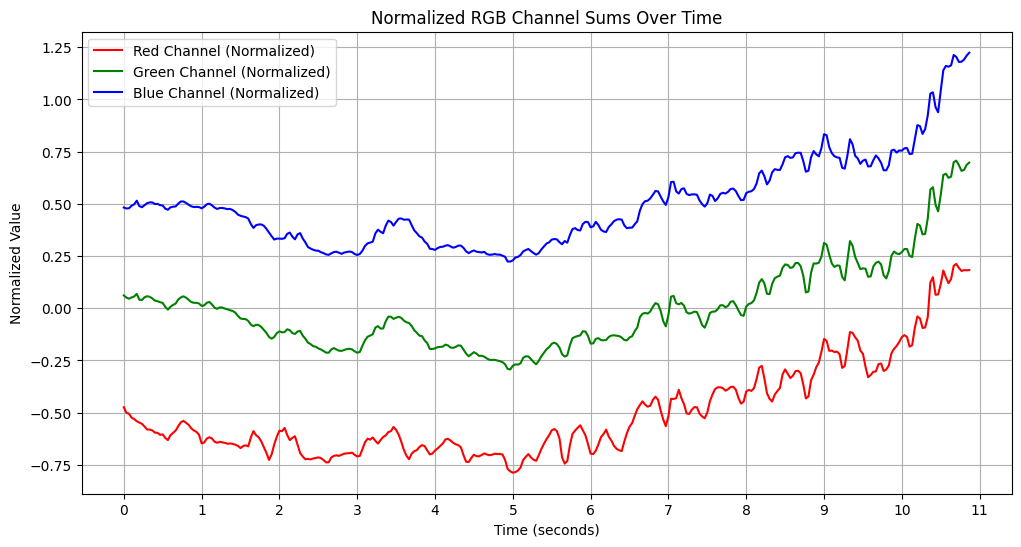

In [8]:
# Plot the normalized time series
plt.figure(figsize=(12, 6))
plt.plot(time, red_normalized, label='Red Channel (Normalized)', color='red')
plt.plot(time, green_normalized, label='Green Channel (Normalized)', color='green')
plt.plot(time, blue_normalized, label='Blue Channel (Normalized)', color='blue')
plt.xlabel('Time (seconds)')
plt.ylabel('Normalized Value')
plt.title('Normalized RGB Channel Sums Over Time')
plt.legend()
plt.xticks(np.arange(0, time[-1] + 1, 1))  # Set x-axis ticks every 1 second
plt.grid(True)
plt.show()

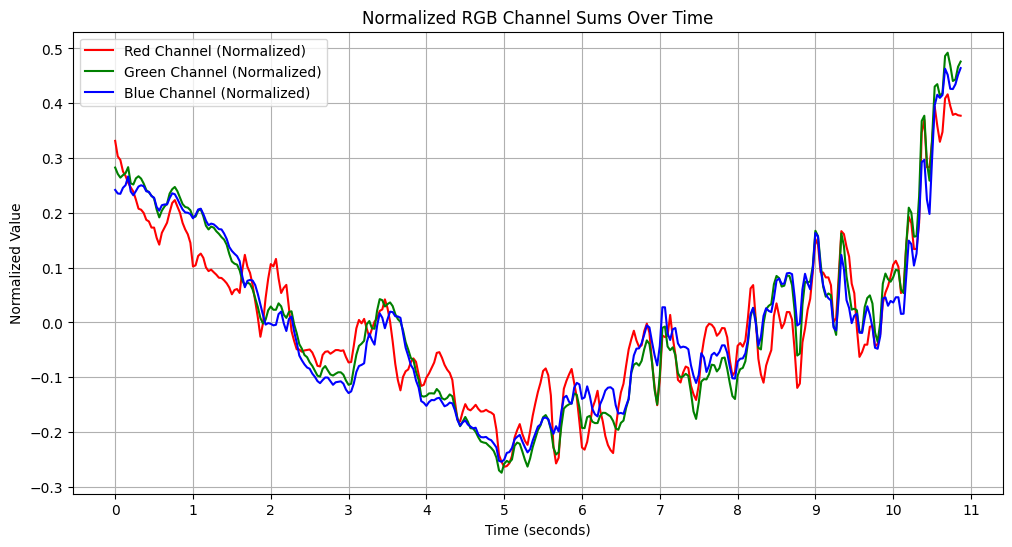

In [9]:
from scipy.signal import detrend

# Detrend the normalized channels
red_detrended = detrend(red_normalized)
green_detrended = detrend(green_normalized)
blue_detrended = detrend(blue_normalized)

plt.figure(figsize=(12, 6))
plt.plot(time, red_detrended, label='Red Channel (Normalized)', color='red')
plt.plot(time, green_detrended, label='Green Channel (Normalized)', color='green')
plt.plot(time, blue_detrended, label='Blue Channel (Normalized)', color='blue')
plt.xlabel('Time (seconds)')
plt.ylabel('Normalized Value')
plt.title('Normalized RGB Channel Sums Over Time')
plt.legend()
plt.xticks(np.arange(0, time[-1] + 1, 1))  # Set x-axis ticks every 1 second
plt.grid(True)
plt.show()

In [20]:
from scipy.signal import butter, filtfilt

def high_pass_filter(data, cutoff, fps, order=2):
    nyquist = 0.5 * fps
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return filtfilt(b, a, data)

# Apply high-pass filter with a cutoff frequency (e.g., 0.1 Hz)
cutoff_freq = 0.1
red_filtered = high_pass_filter(red_normalized, cutoff_freq, fps)
green_filtered = high_pass_filter(green_normalized, cutoff_freq, fps)
blue_filtered = high_pass_filter(blue_normalized, cutoff_freq, fps)

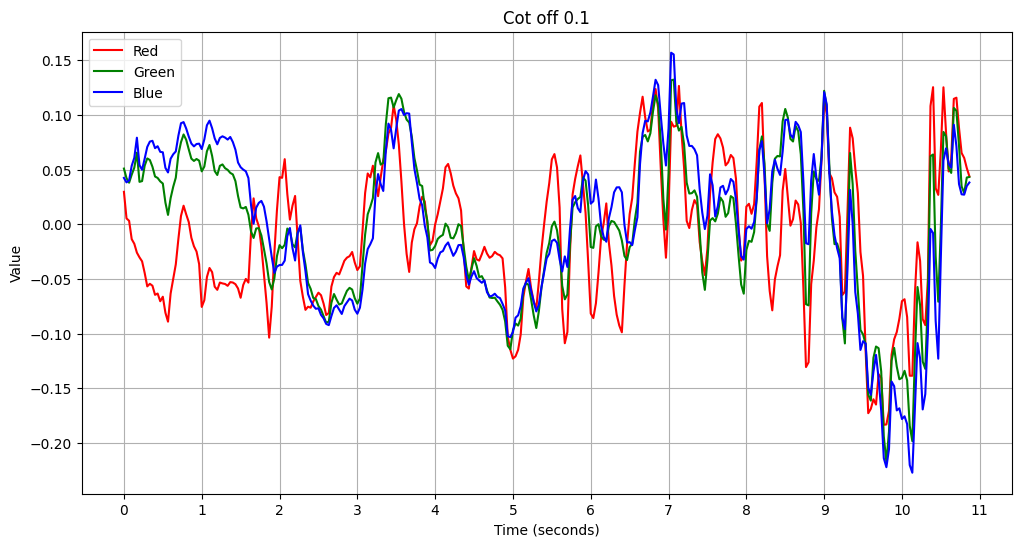

In [21]:
def plotit(R,  G, B, time, tit="Value"):
    plt.figure(figsize=(12, 6))
    plt.plot(time, R, label='Red', color='red')
    plt.plot(time, G, label='Green', color='green')
    plt.plot(time, B, label='Blue', color='blue')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Value')
    plt.title(tit)
    plt.legend()
    plt.xticks(np.arange(0, time[-1] + 1, 1))  # Set x-axis ticks every 1 second
    plt.grid(True)
    plt.show()

plotit(red_filtered, green_filtered, blue_filtered, time=time, tit="Cot off" )

In [5]:
from scipy.signal import butter, filtfilt
import numpy as np

# Function to calculate the first derivative
def calculate_derivative(signal, fps):
    # Numerical differentiation (central difference)
    derivative = np.gradient(signal, 1/fps)
    return derivative

# Function to apply low-pass filter
def low_pass_filter(signal, cutoff, fps, order=4):
    nyquist = 0.5 * fps
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, signal)

# Start with normalized signals
red_normalized = normalize(red_sums)
green_normalized = normalize(green_sums)
blue_normalized = normalize(blue_sums)

# Calculate the first derivative
red_derivative = calculate_derivative(red_normalized, fps)
green_derivative = calculate_derivative(green_normalized, fps)
blue_derivative = calculate_derivative(blue_normalized, fps)

# Apply low-pass filter to the derivative
cutoff_freq = 0.5 * (0.5 * fps)  # Half of Nyquist frequency
red_filtered_derivative = low_pass_filter(red_derivative, cutoff_freq, fps)
green_filtered_derivative = low_pass_filter(green_derivative, cutoff_freq, fps)
blue_filtered_derivative = low_pass_filter(blue_derivative, cutoff_freq, fps)

# Plot the filtered derivatives
def plotit(R, G, B, time, tit="Filtered Derivative (Normalized)"):
    plt.figure(figsize=(12, 6))
    plt.plot(time, R, label='Red', color='red')
    plt.plot(time, G, label='Green', color='green')
    plt.plot(time, B, label='Blue', color='blue')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Value')
    plt.title(tit)
    plt.legend()
    plt.xticks(np.arange(0, time[-1] + 1, 1))  # Set x-axis ticks every 1 second
    plt.grid(True)
    plt.show()

plotit(red_filtered_derivative, green_filtered_derivative, blue_filtered_derivative, time)

NameError: name 'red_sums' is not defined